In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product


# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

In [4]:
df = pd.read_csv('train_data.csv', sep = ',')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [5]:
# Select the relevant columns
columns_to_describe = [
    'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
    'Industry Code Description', 'Medical Fee Region', 'OIICS Nature of Injury Description',
    'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
    'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
    'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
    'Agreement Reached', 'WCB Decision', 'Number of Dependents'
]

# Perform describe on selected columns
df[columns_to_describe].describe(include='all')

First Hearing Date  Gender    IME-4 Count  Industry Code  \
count              150798  574026  132803.000000  564068.000000   
unique               1094       4            NaN            NaN   
top            2022-04-15       M            NaN            NaN   
freq                  440  335218            NaN            NaN   
mean                  NaN     NaN       3.207337      58.645305   
std                   NaN     NaN       2.832303      19.644175   
min                   NaN     NaN       1.000000      11.000000   
25%                   NaN     NaN       1.000000      45.000000   
50%                   NaN     NaN       2.000000      61.000000   
75%                   NaN     NaN       4.000000      71.000000   
max                   NaN     NaN      73.000000      92.000000   

                Industry Code Description Medical Fee Region  \
count                              564068             574026   
unique                                 20                  5   
top     HEALTH CARE AND SOCIAL ASSISTANCE                 IV   
freq                               114339             265981   
mean                                  NaN                NaN   
std                                   NaN                NaN   
min                                   NaN                NaN   
25%                                   NaN                NaN   
50%                                   NaN                NaN   
75%                                   NaN                NaN   
max                                   NaN                NaN   

        OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
count                                  0.0              558386.000000   
unique                                 NaN                        NaN   
top                                    NaN                        NaN   
freq                                   NaN                        NaN   
mean                                   NaN                  54.381143   
std                                    NaN                  25.874281   
min                                    NaN                   1.000000   
25%                                    NaN                  31.000000   
50%                                    NaN                  56.000000   
75%                                    NaN                  75.000000   
max                                    NaN                  99.000000   

       WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
count                            558386               558369.000000   
unique                               74                         NaN   
top                             LIFTING                         NaN   
freq                              46610                         NaN   
mean                                NaN                   41.013839   
std                                 NaN                   22.207521   
min                                 NaN                    1.000000   
25%                                 NaN                   16.000000   
50%                                 NaN                   49.000000   
75%                                 NaN                   52.000000   
max                                 NaN                   91.000000   

       WCIO Nature of Injury Description  WCIO Part Of Body Code  \
count                             558369           556944.000000   
unique                                56                     NaN   
top                       STRAIN OR TEAR                     NaN   
freq                              153373                     NaN   
mean                                 NaN               39.738146   
std                                  NaN               22.365940   
min                                  NaN               -9.000000   
25%                                  NaN               33.000000   
50%                                  NaN               38.000000   
75%                    

In [6]:

# Specify columns for descriptive analysis
columns_to_describe = [
    'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code', 'Industry Code Description',
    'Medical Fee Region', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
    'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
    'WCB Decision', 'Number of Dependents'
]

# Check if columns exist in the dataset
existing_columns = [col for col in columns_to_describe if col in df.columns]
missing_columns = [col for col in columns_to_describe if col not in df.columns]

# Perform descriptive statistics on the existing columns
description = df[existing_columns].describe(include='all')
print("Descriptive Analysis of Selected Columns:")
print(description)

# Analyze missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values and their percentage
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print("\nMissing Values Analysis:")
print(missing_data)

Descriptive Analysis of Selected Columns:
       First Hearing Date  Gender    IME-4 Count  Industry Code  \
count              150798  574026  132803.000000  564068.000000   
unique               1094       4            NaN            NaN   
top            2022-04-15       M            NaN            NaN   
freq                  440  335218            NaN            NaN   
mean                  NaN     NaN       3.207337      58.645305   
std                   NaN     NaN       2.832303      19.644175   
min                   NaN     NaN       1.000000      11.000000   
25%                   NaN     NaN       1.000000      45.000000   
50%                   NaN     NaN       2.000000      61.000000   
75%                   NaN     NaN       4.000000      71.000000   
max                   NaN     NaN      73.000000      92.000000   

                Industry Code Description Medical Fee Region  \
count                              564068             574026   
unique                   

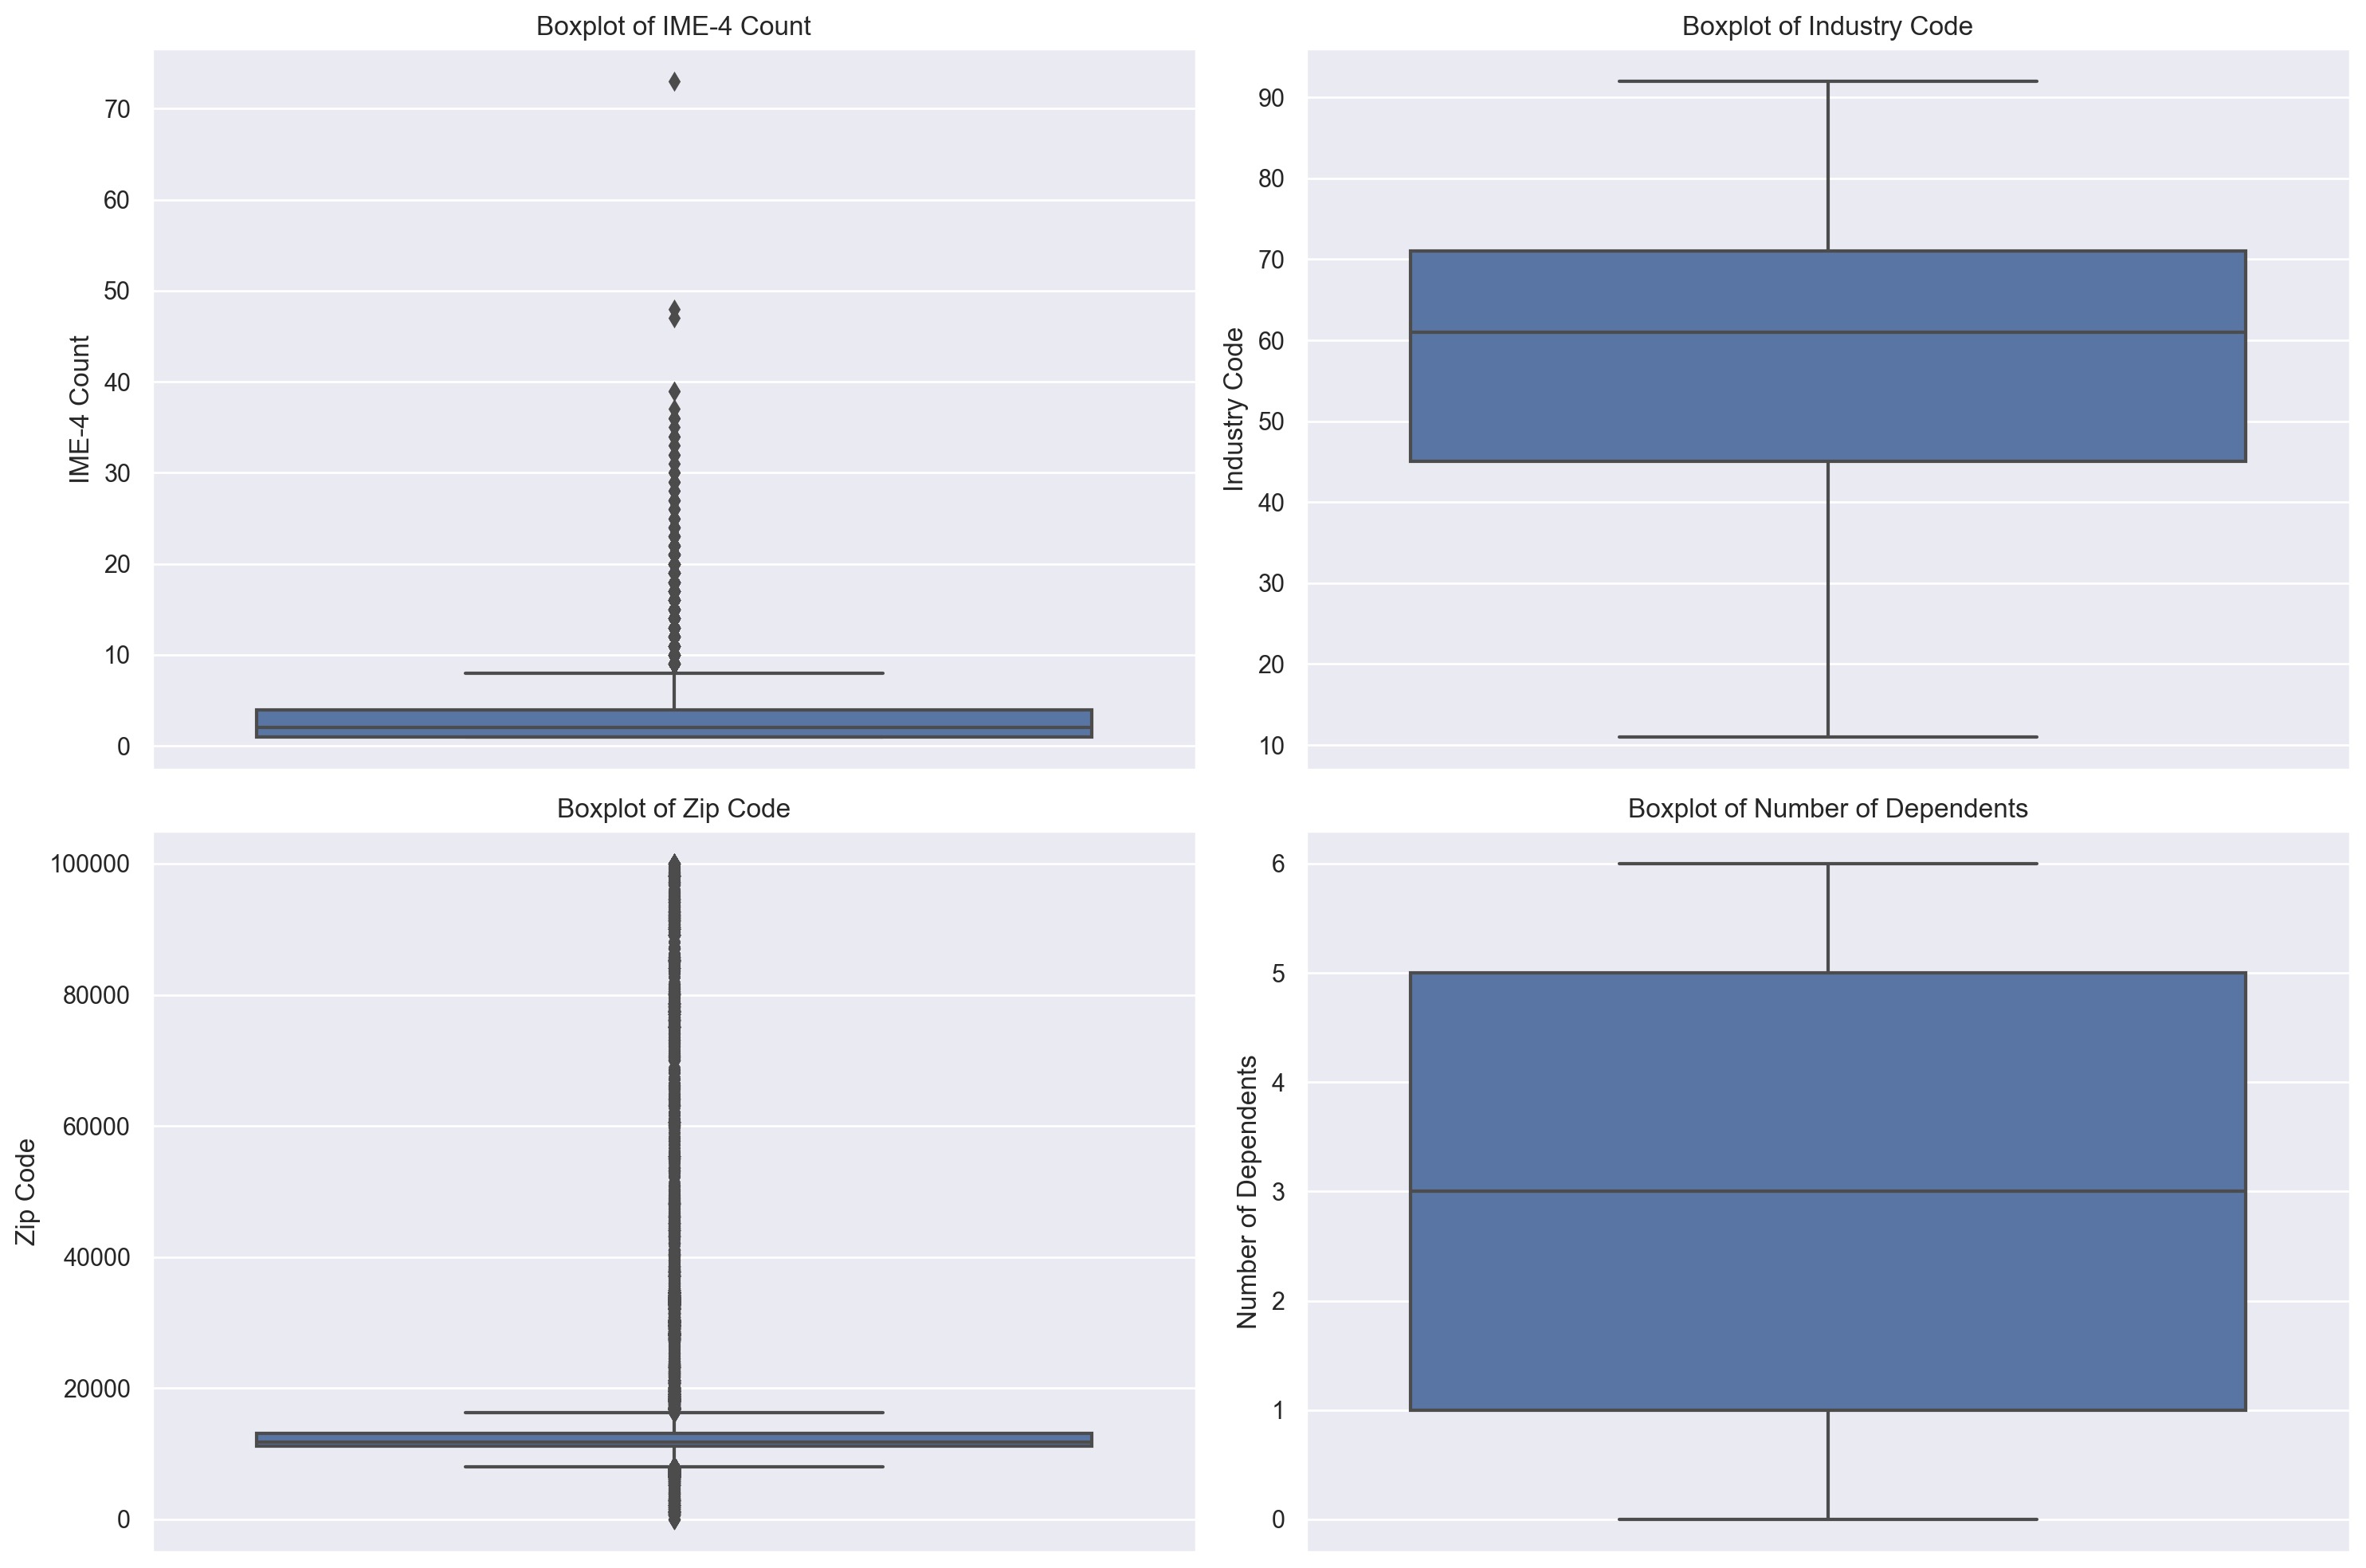

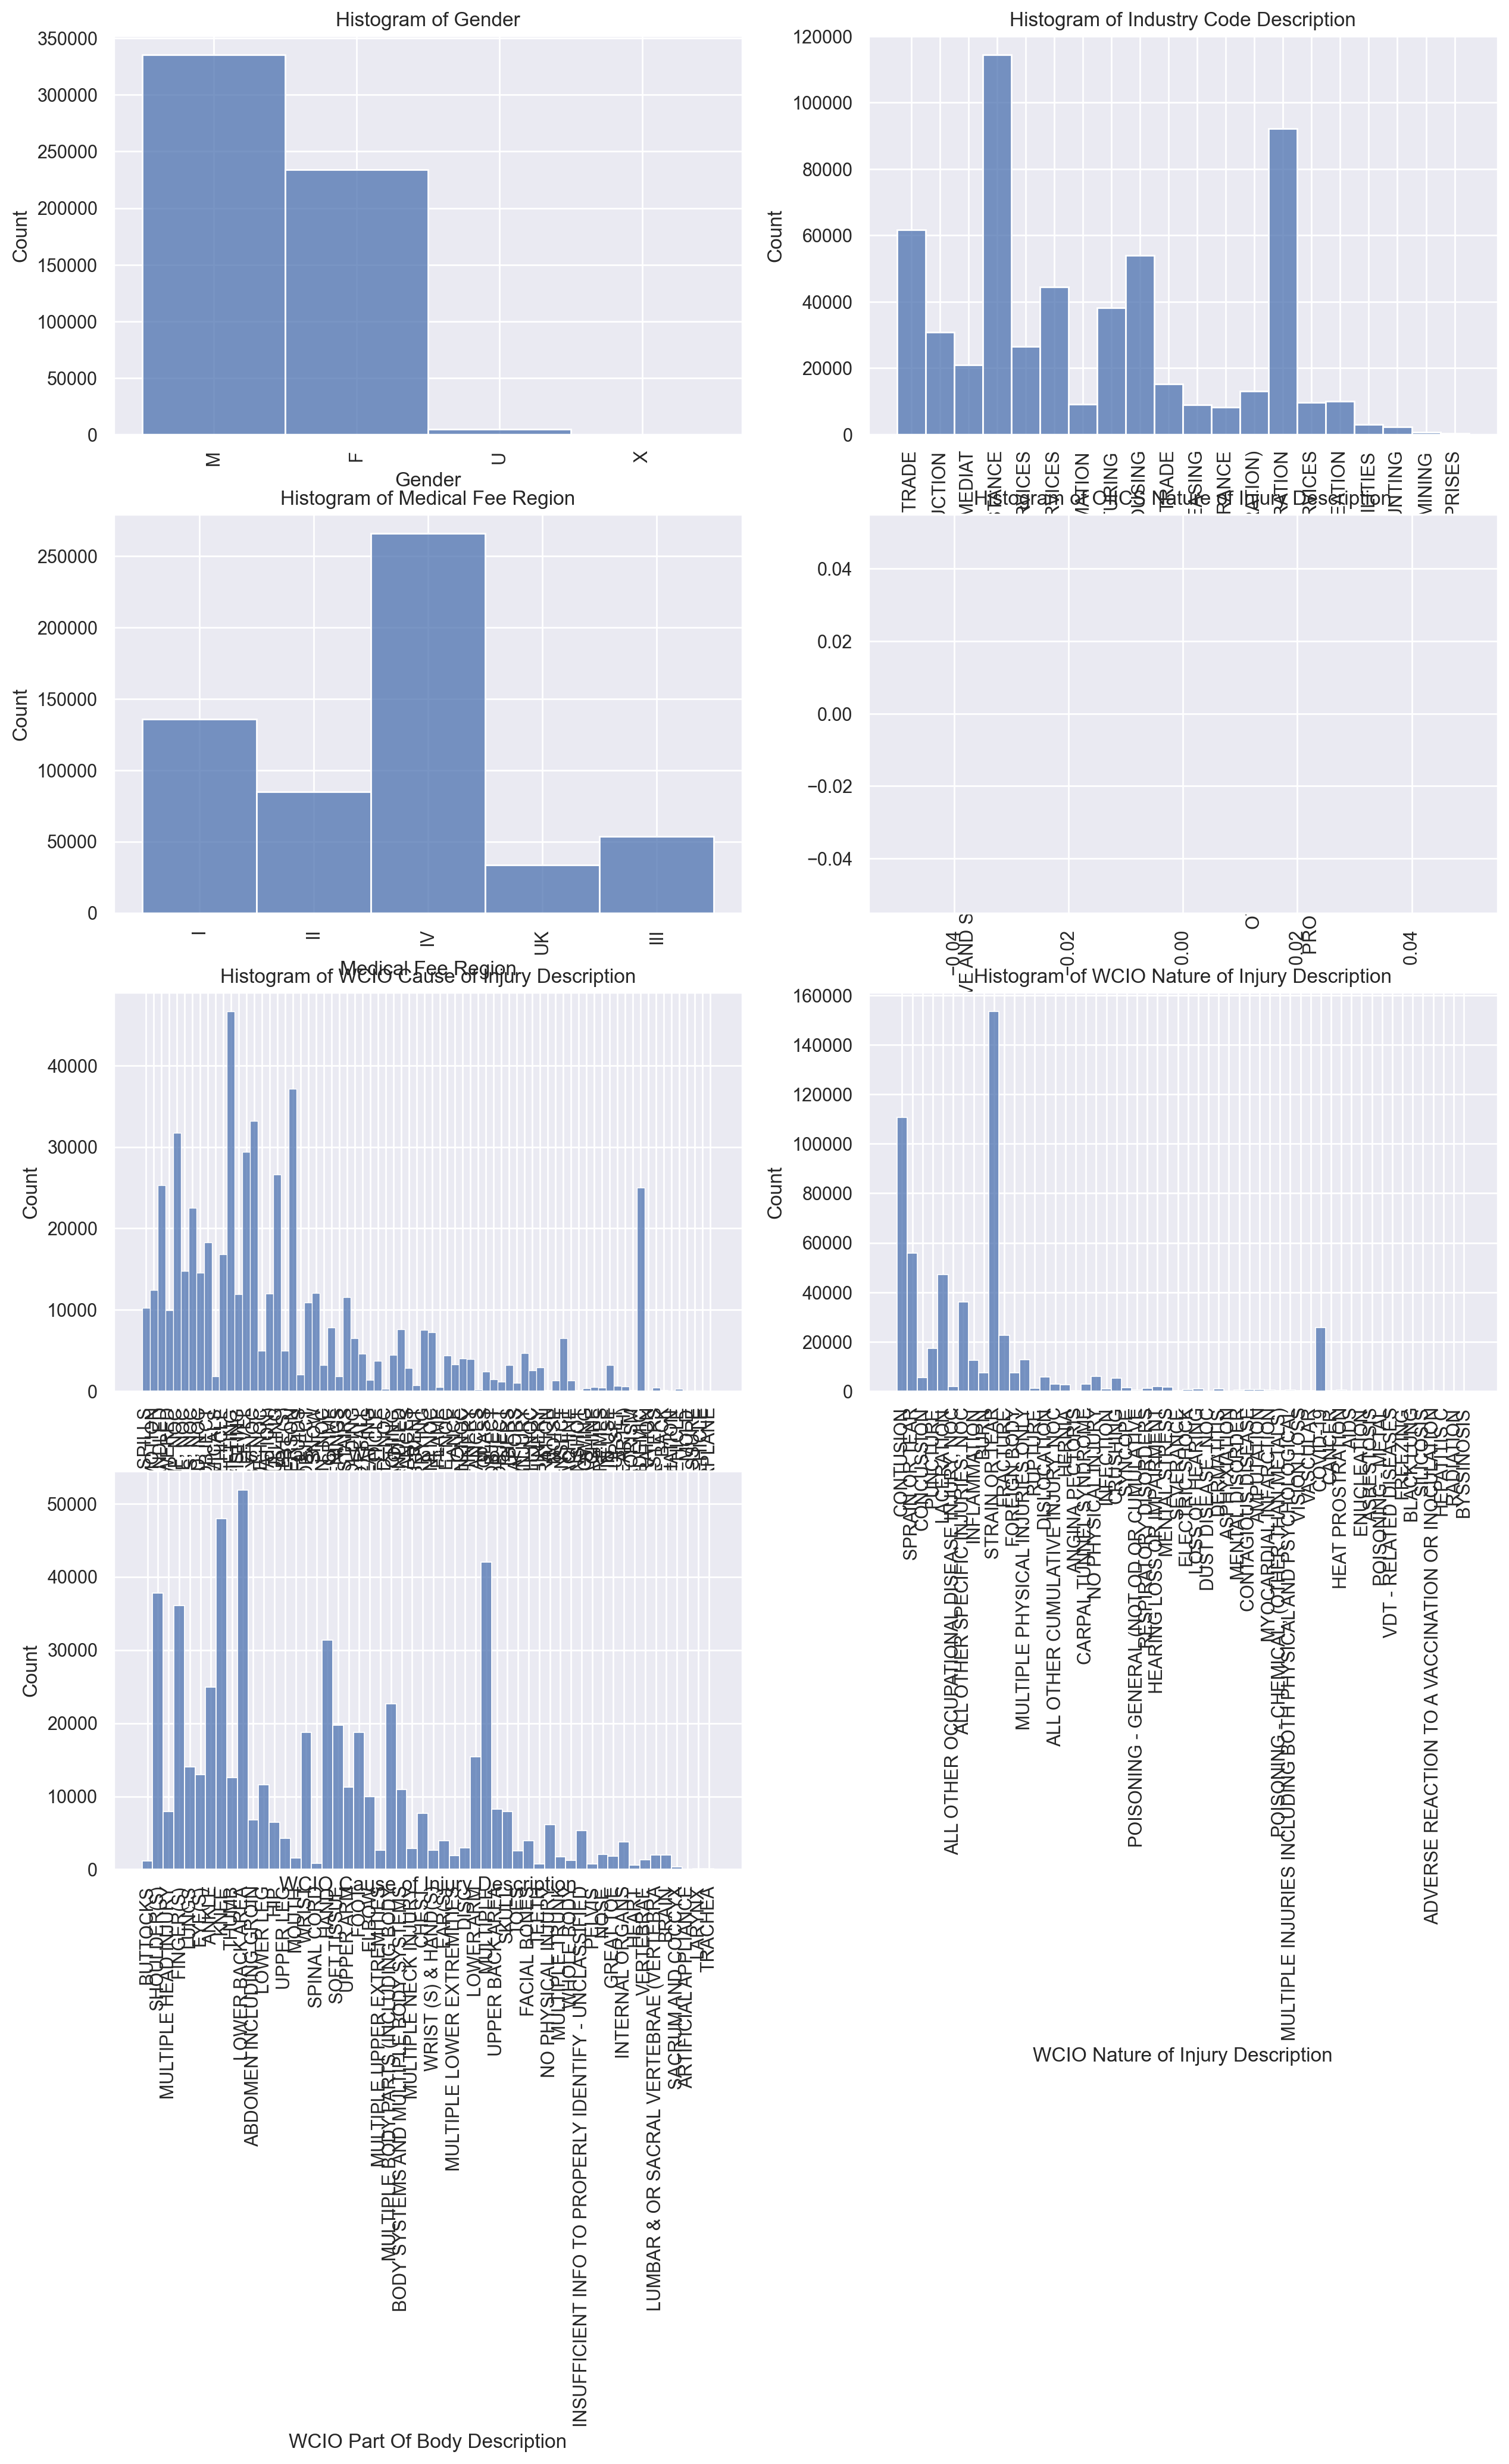

In [7]:
#Specify numerical and categorical columns
numerical_columns = ['IME-4 Count', 'Industry Code', 'Zip Code', 'Number of Dependents']
categorical_columns = [
    'Gender', 'Industry Code Description', 'Medical Fee Region', 'OIICS Nature of Injury Description',
    'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'
]

# Convert numerical columns to numeric data type if necessary, to avoid errors
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vertical boxplot for each numerical variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(y=df[col].dropna())  # Plot on the y-axis to make it vertical
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Histogram for each categorical variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 2 + 1, 2, i)
    sns.histplot(df[col].dropna(), kde=False)
    plt.xticks(rotation=90)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

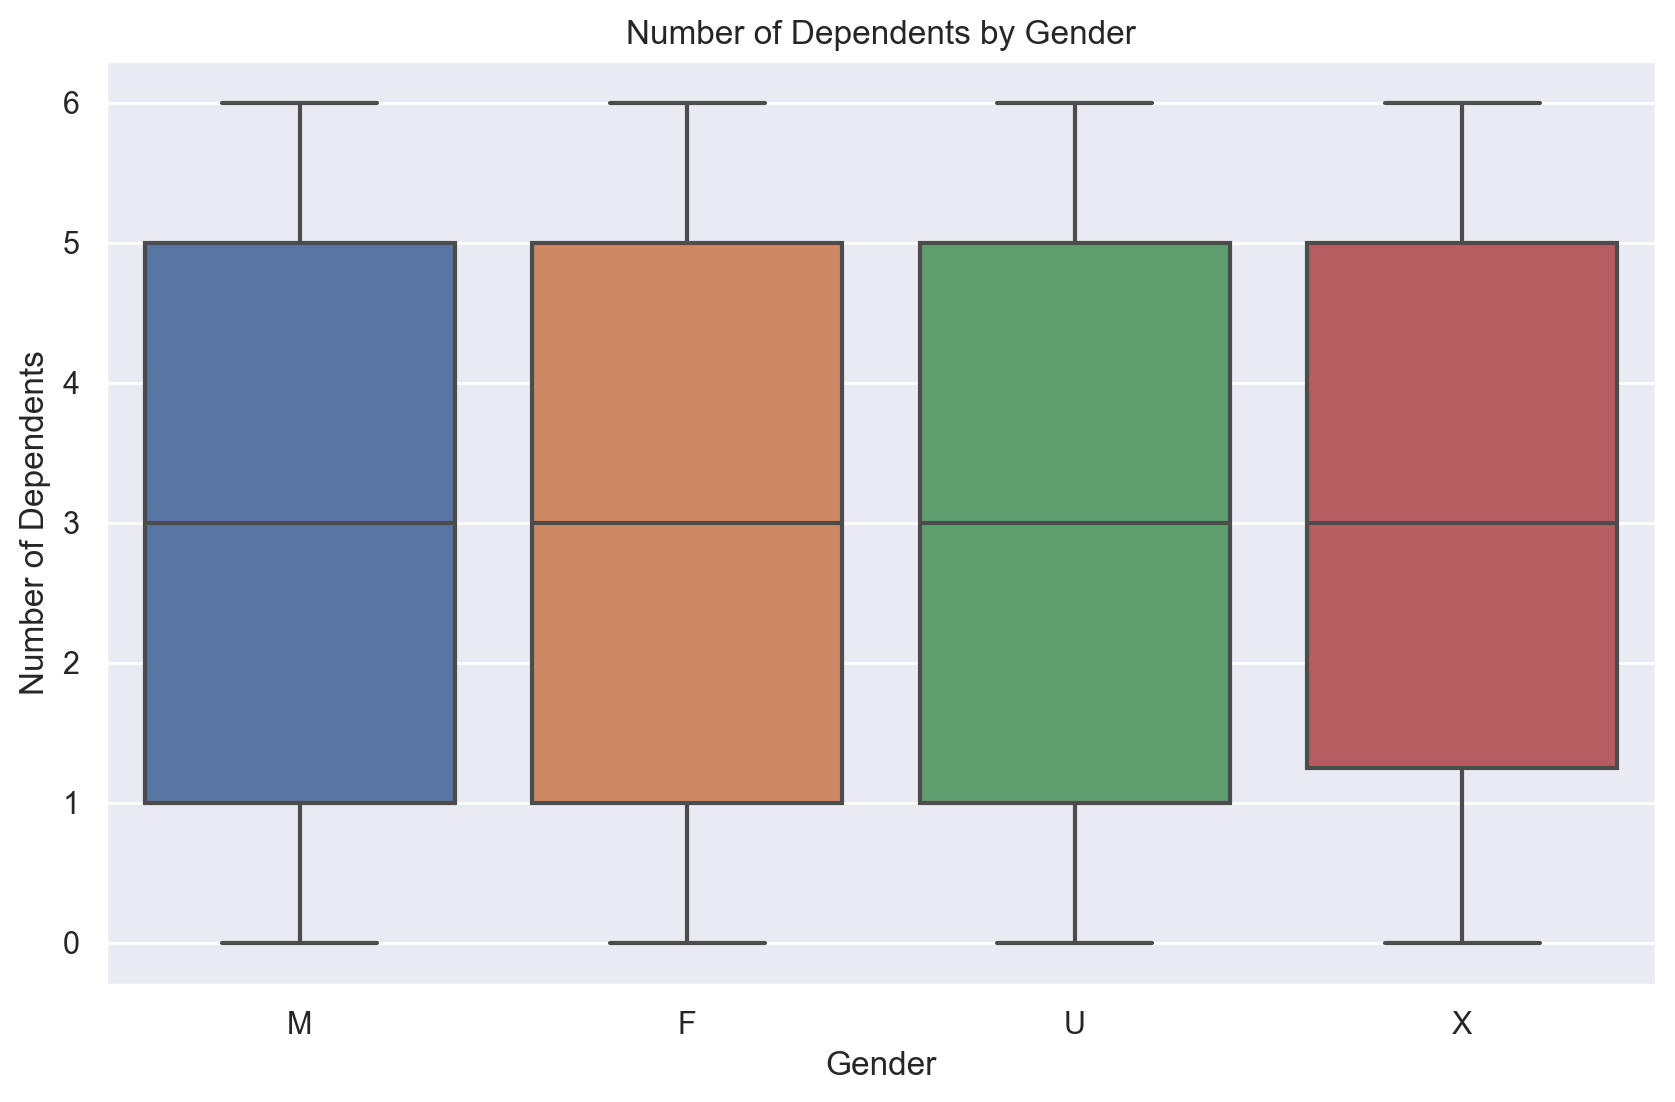

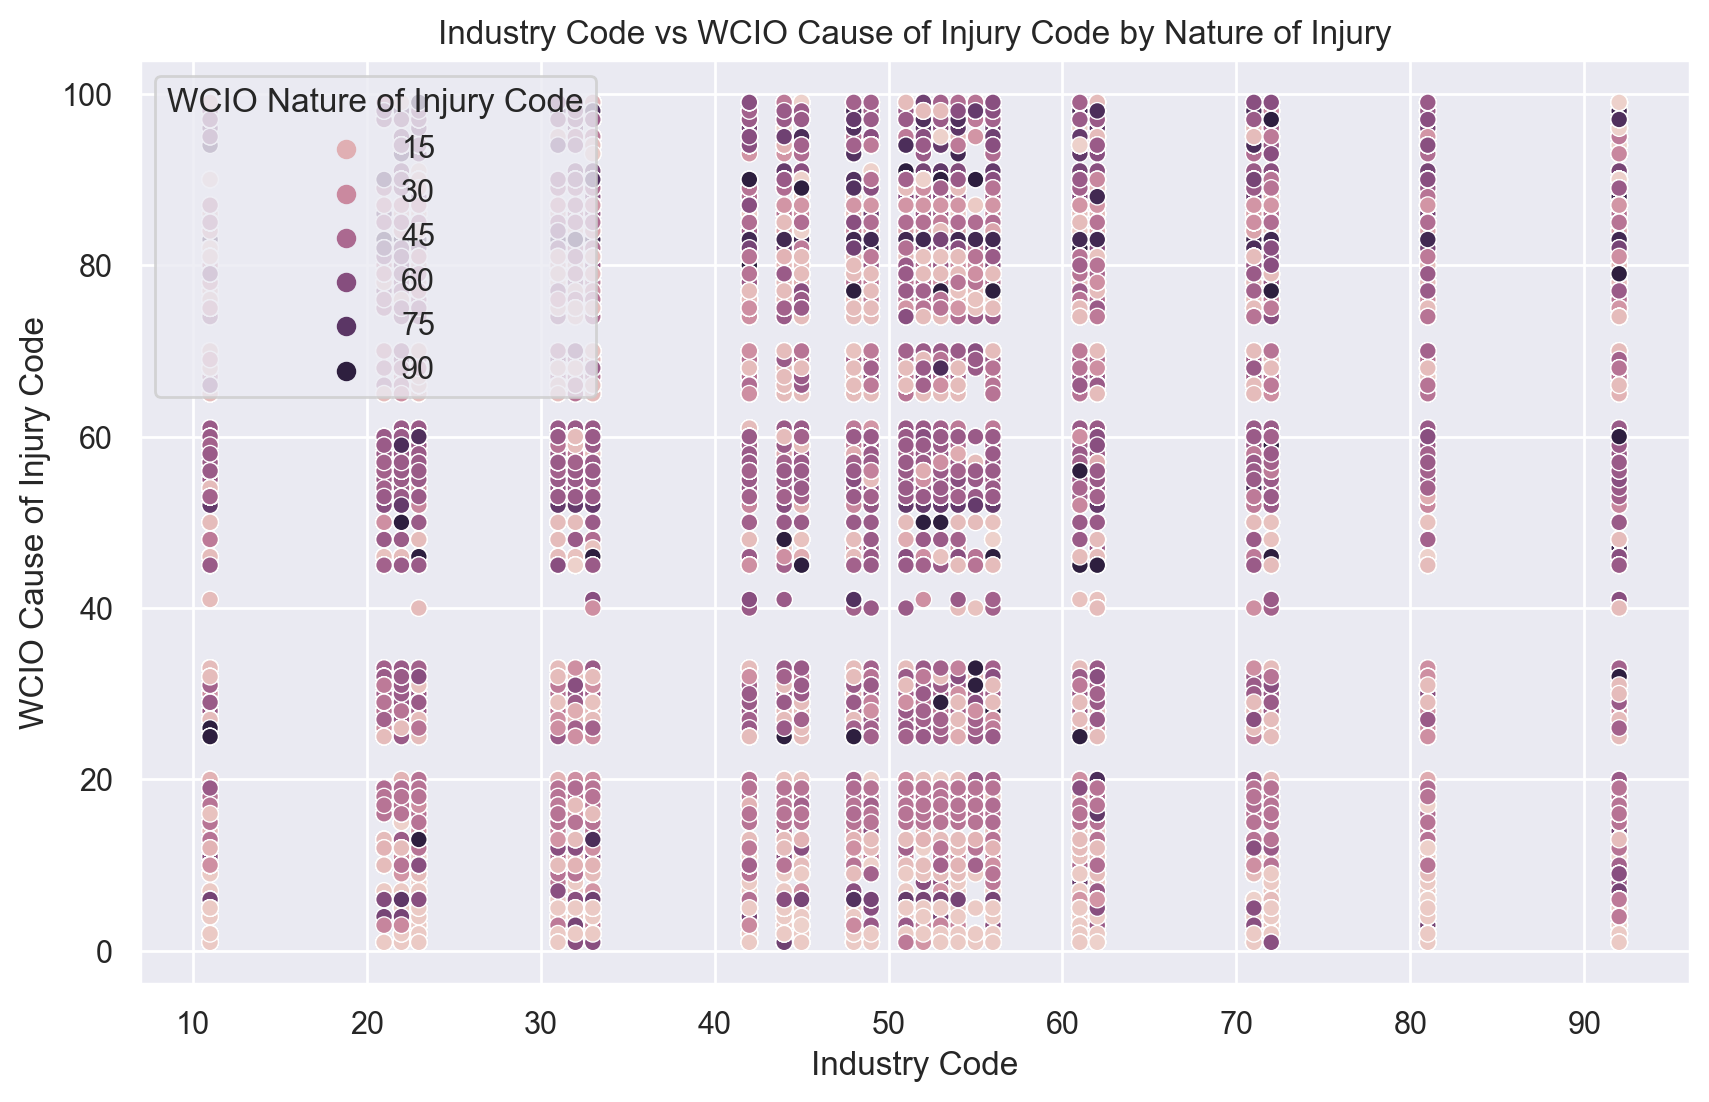

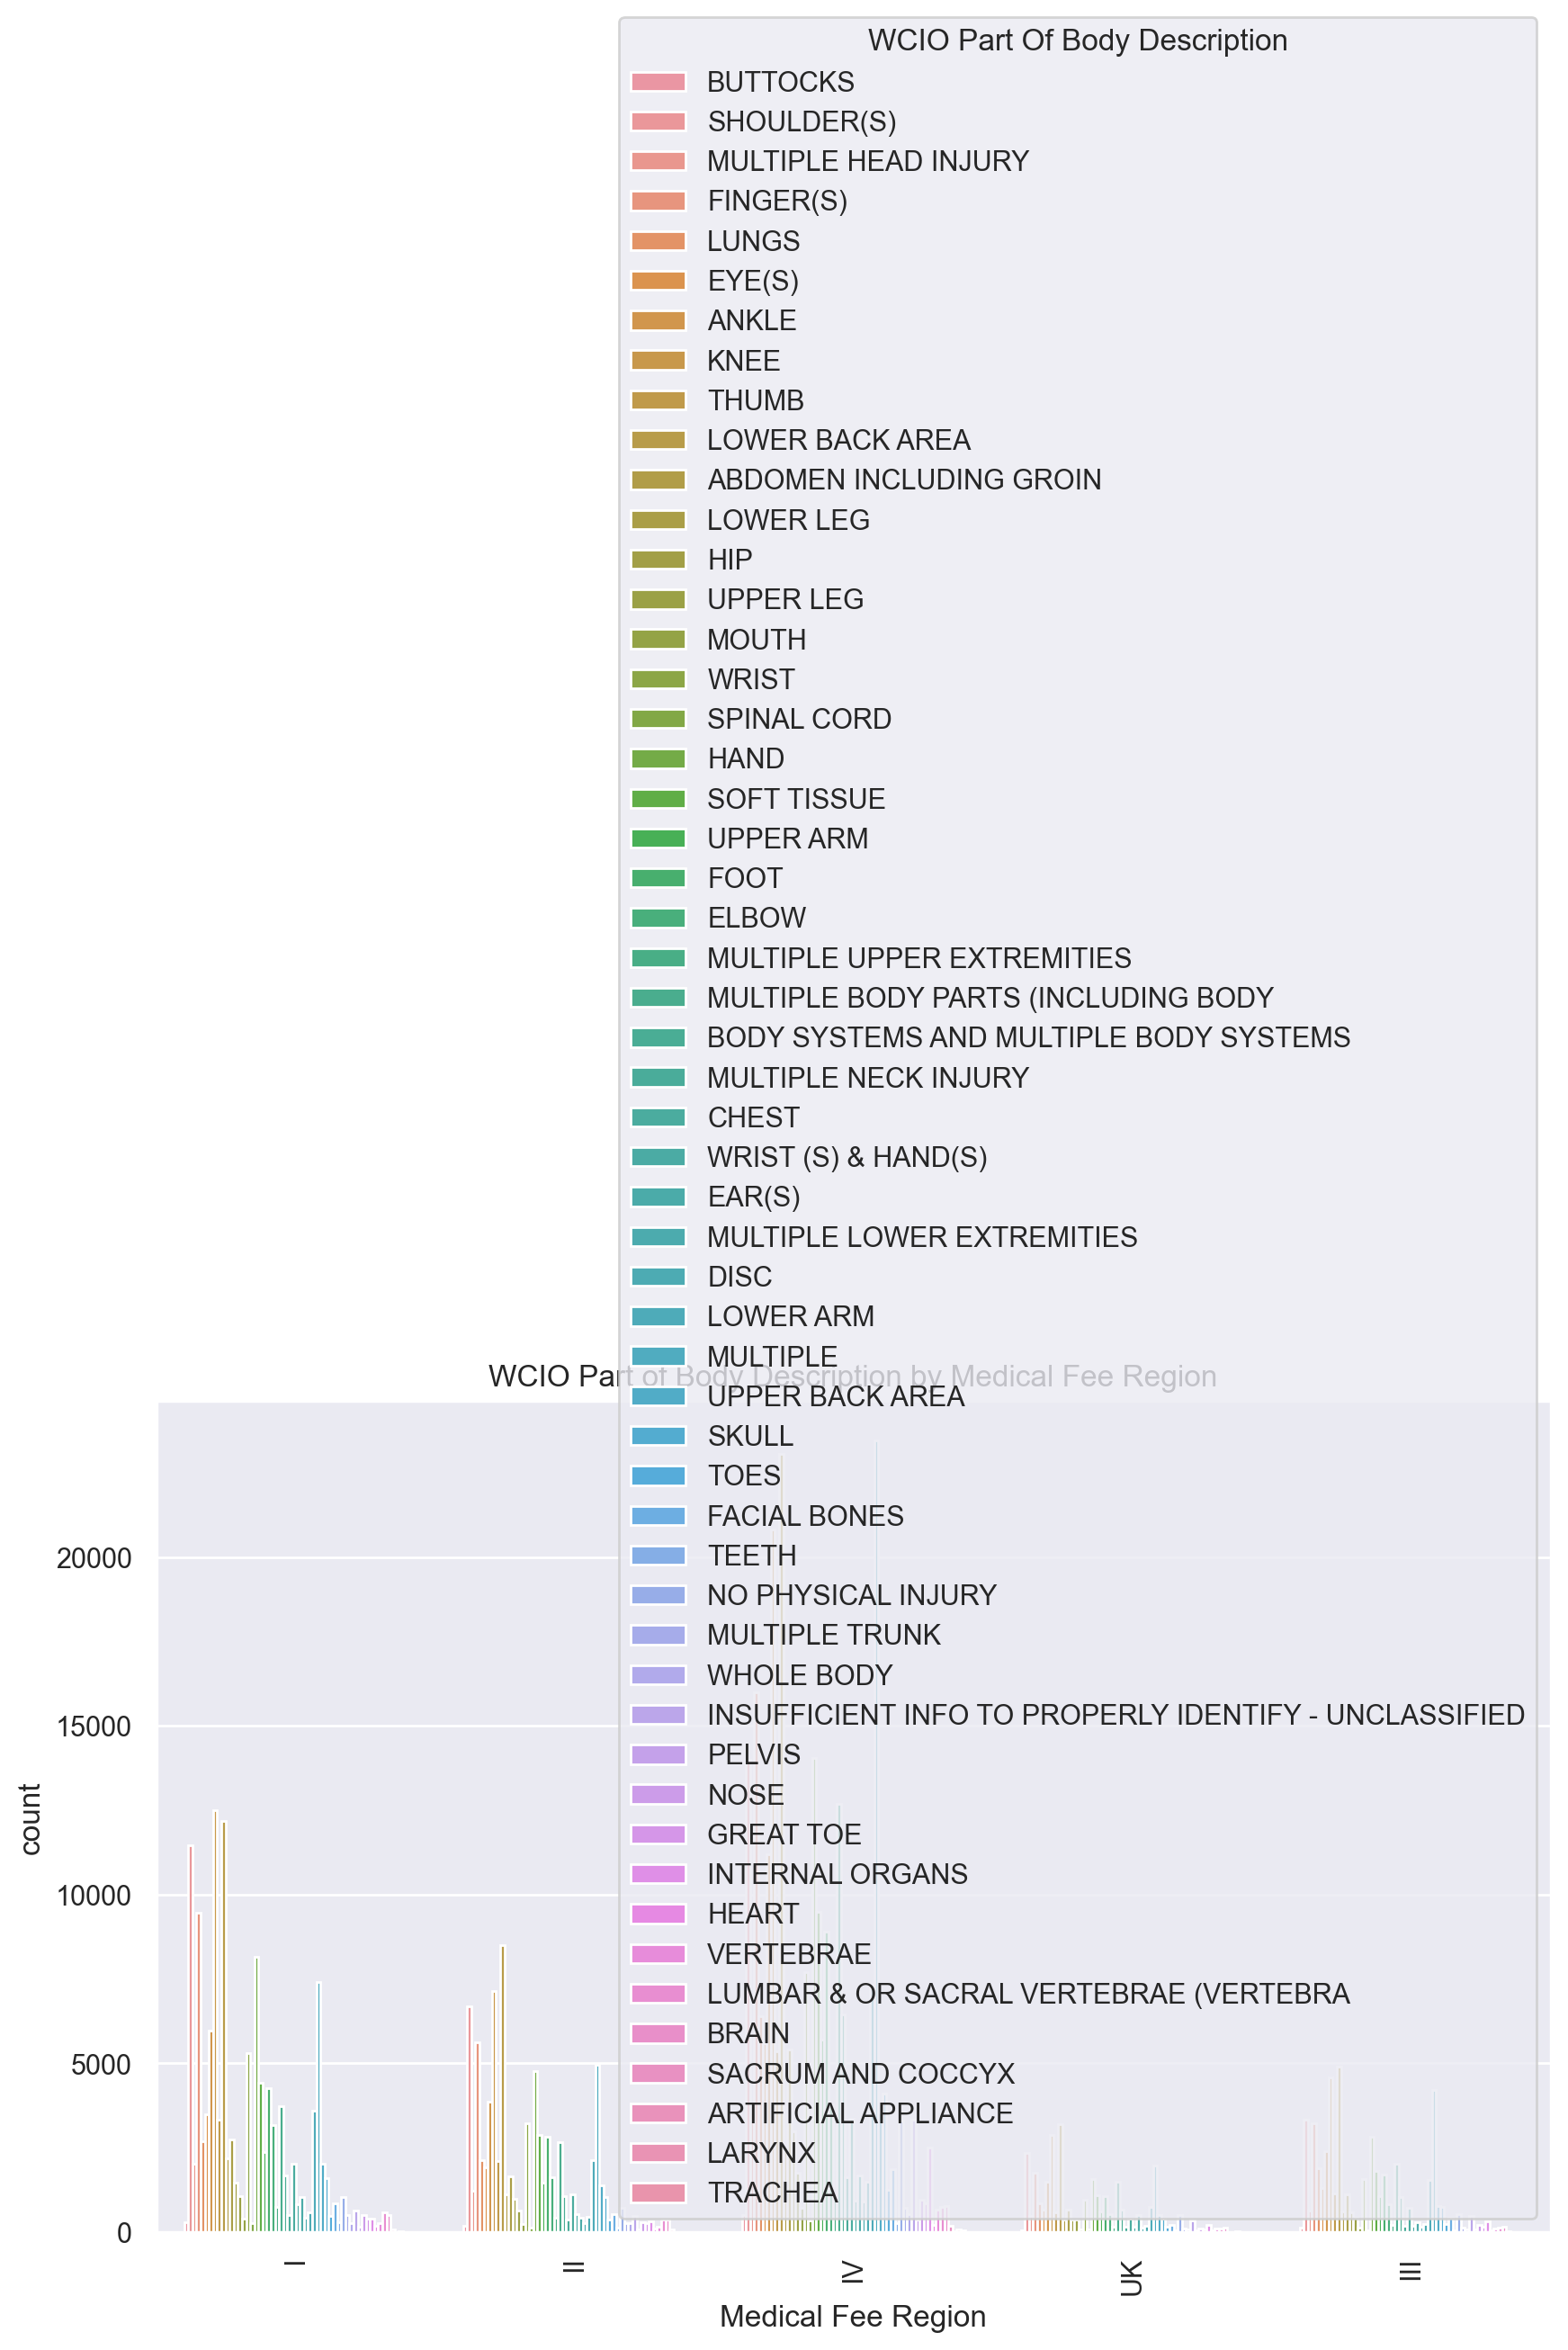

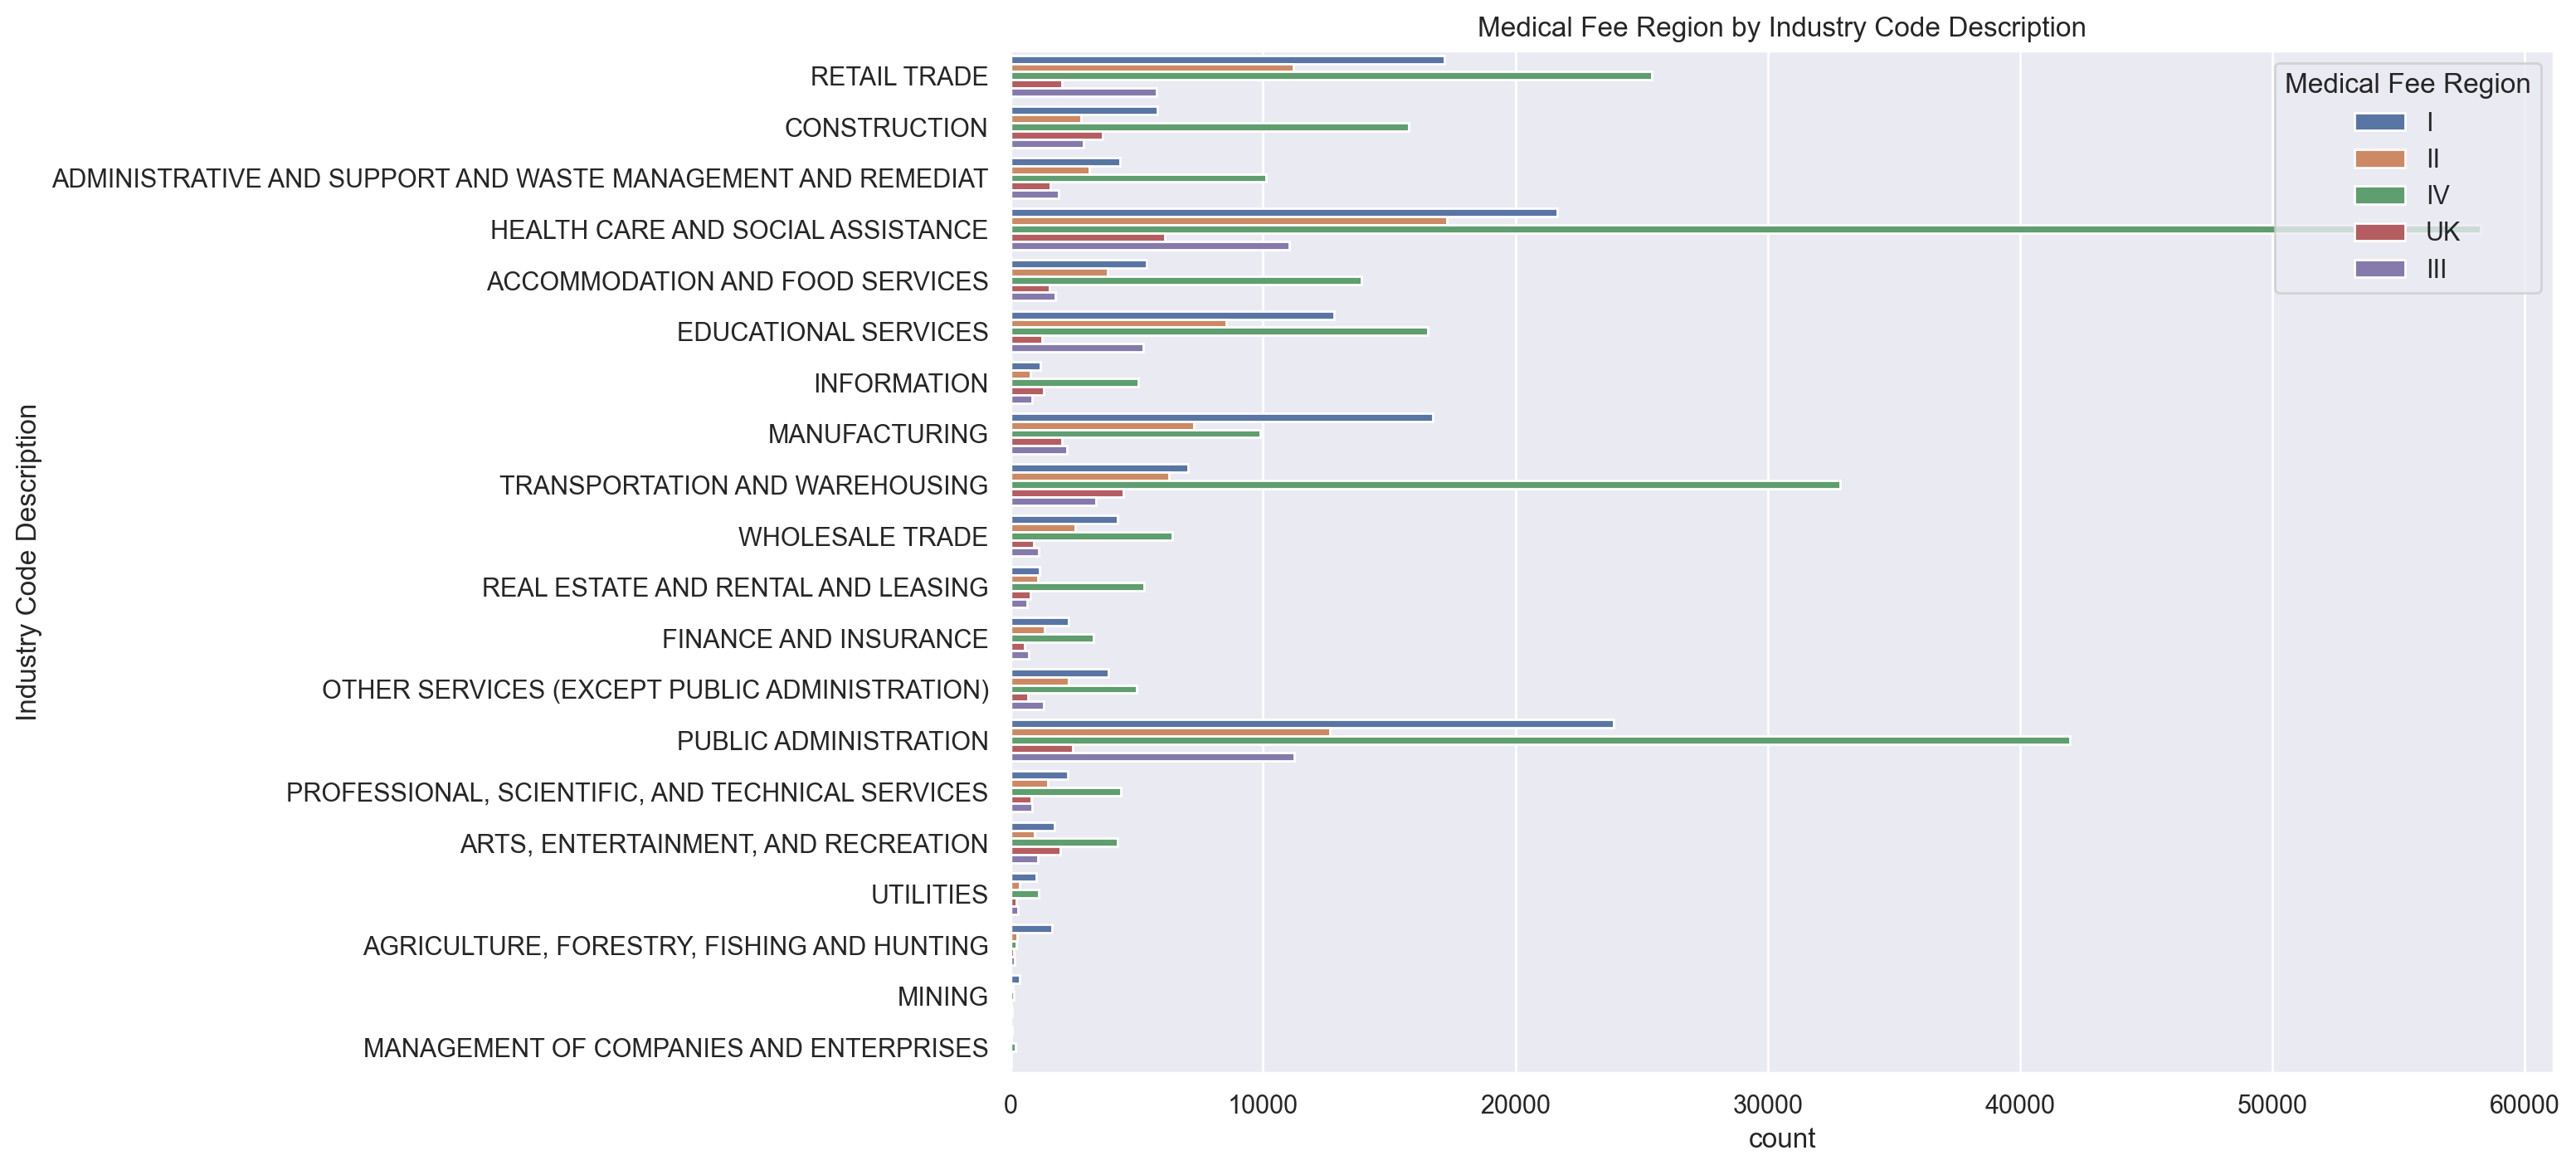

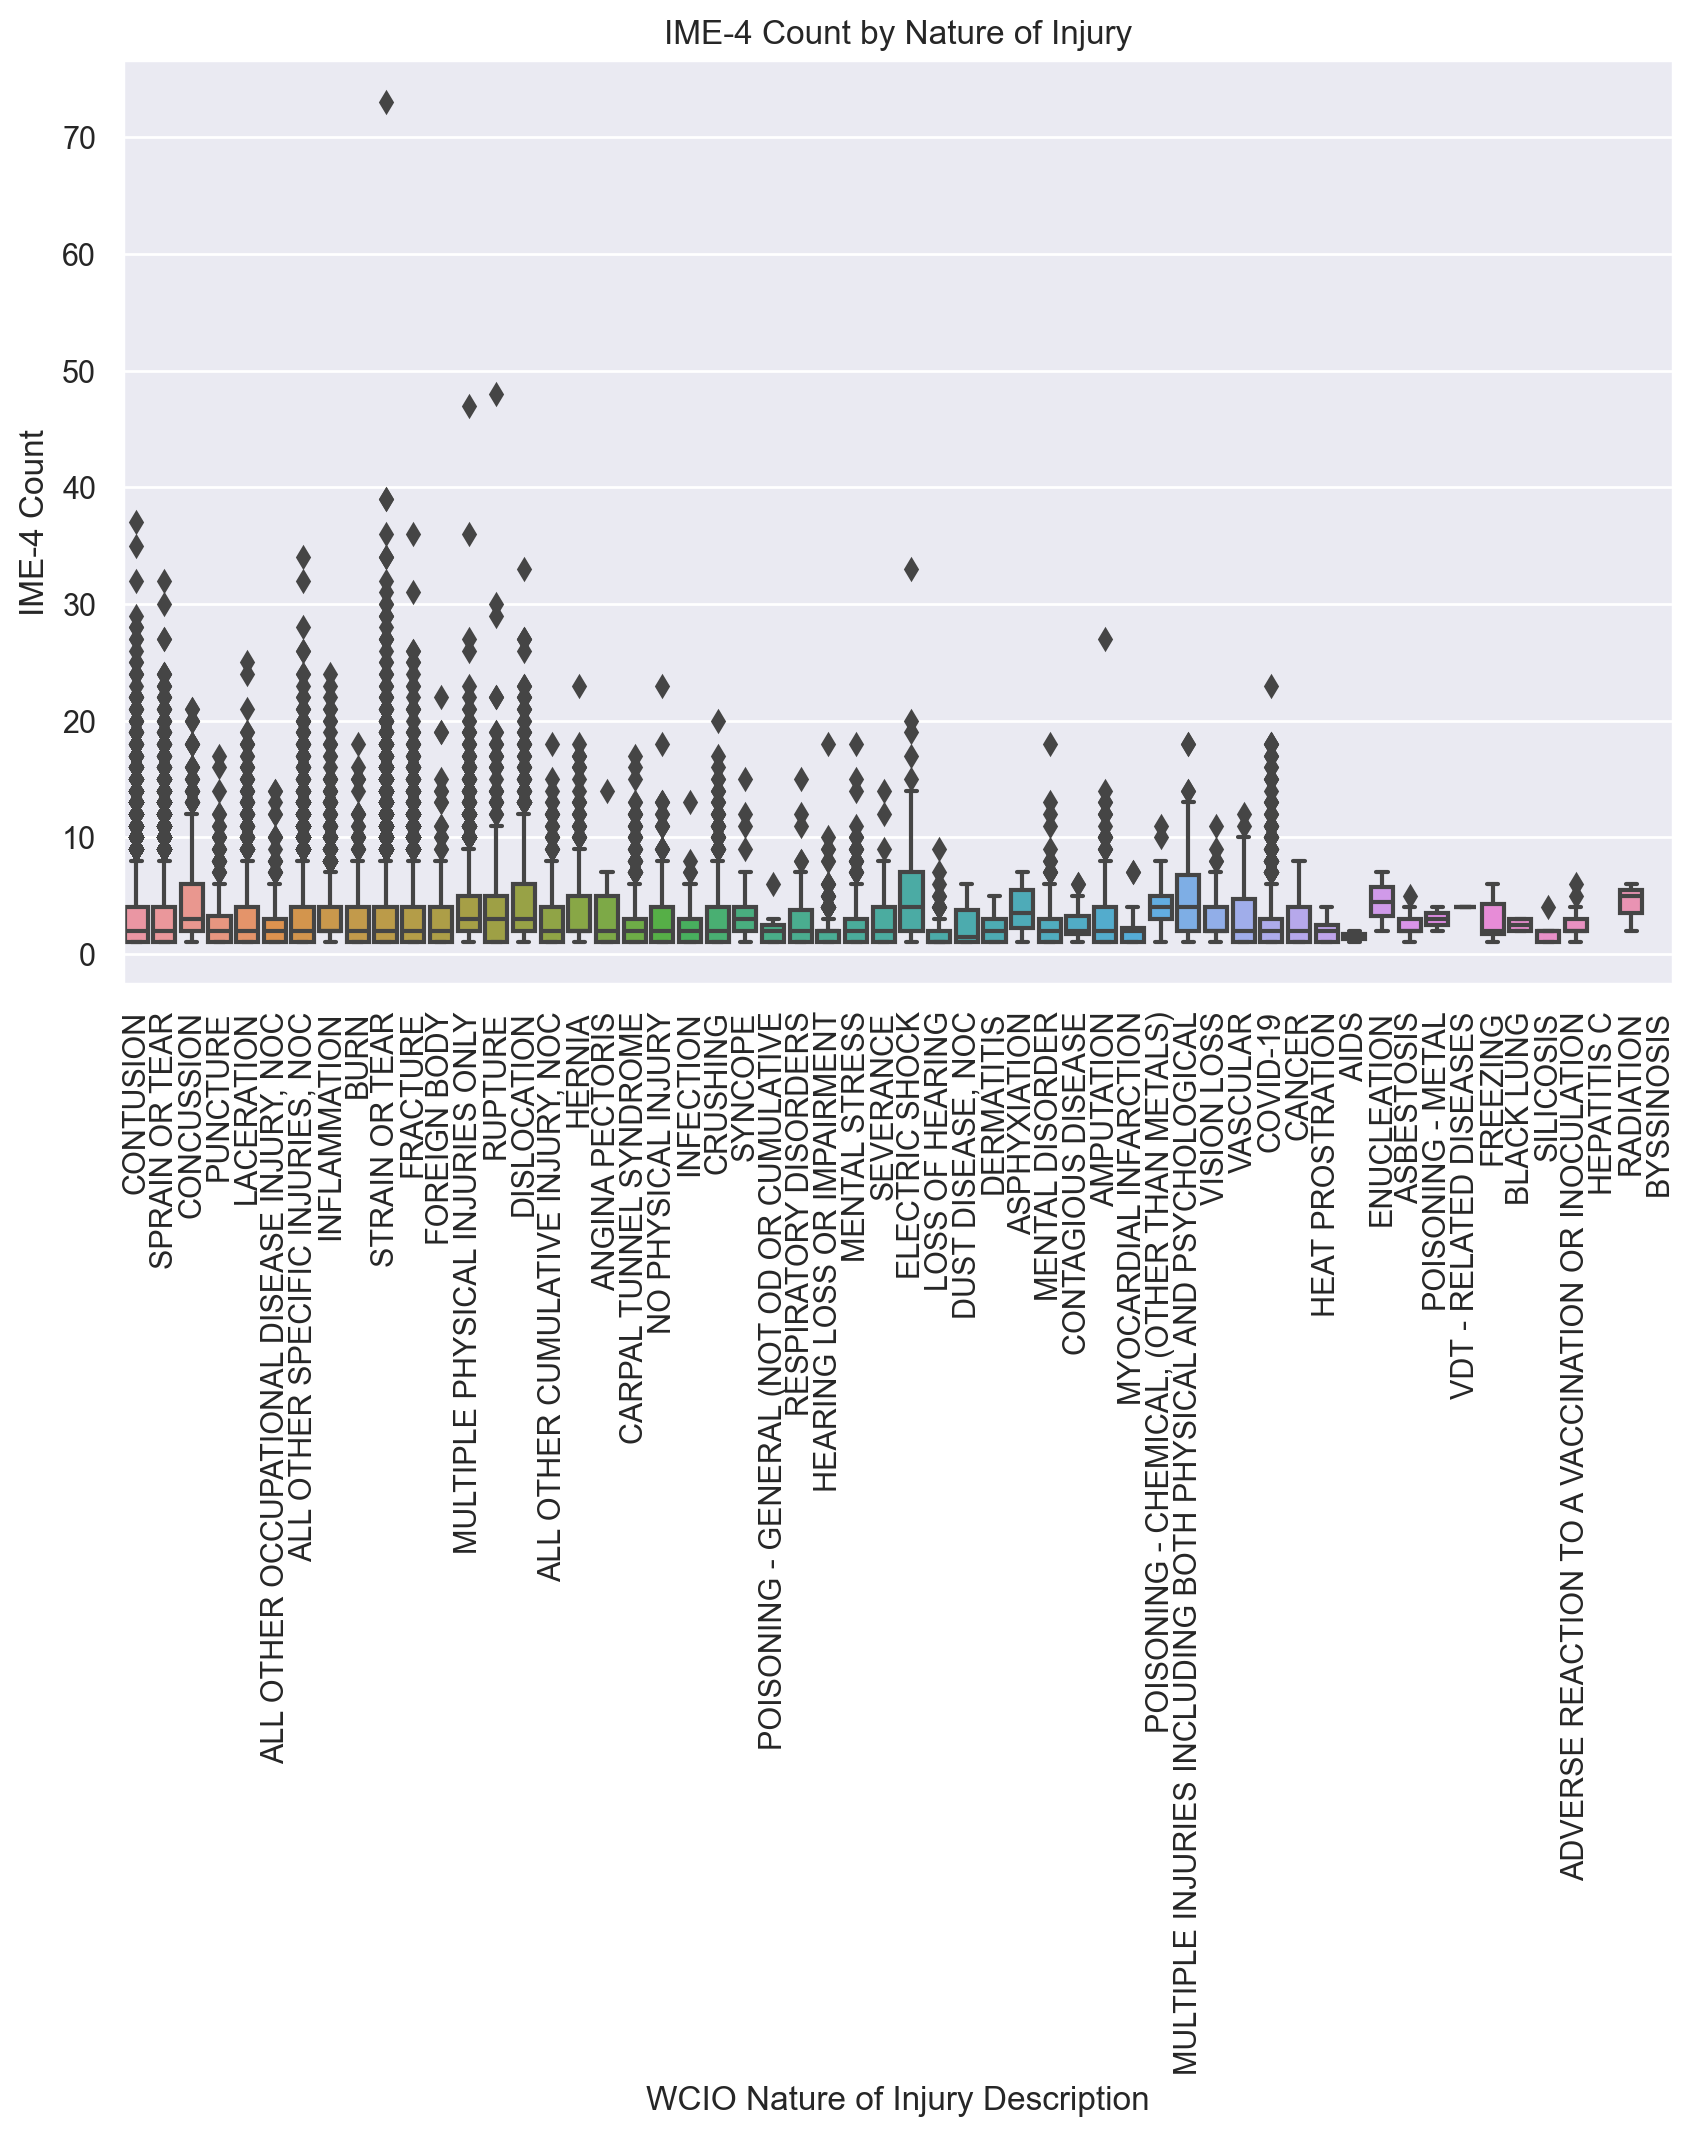

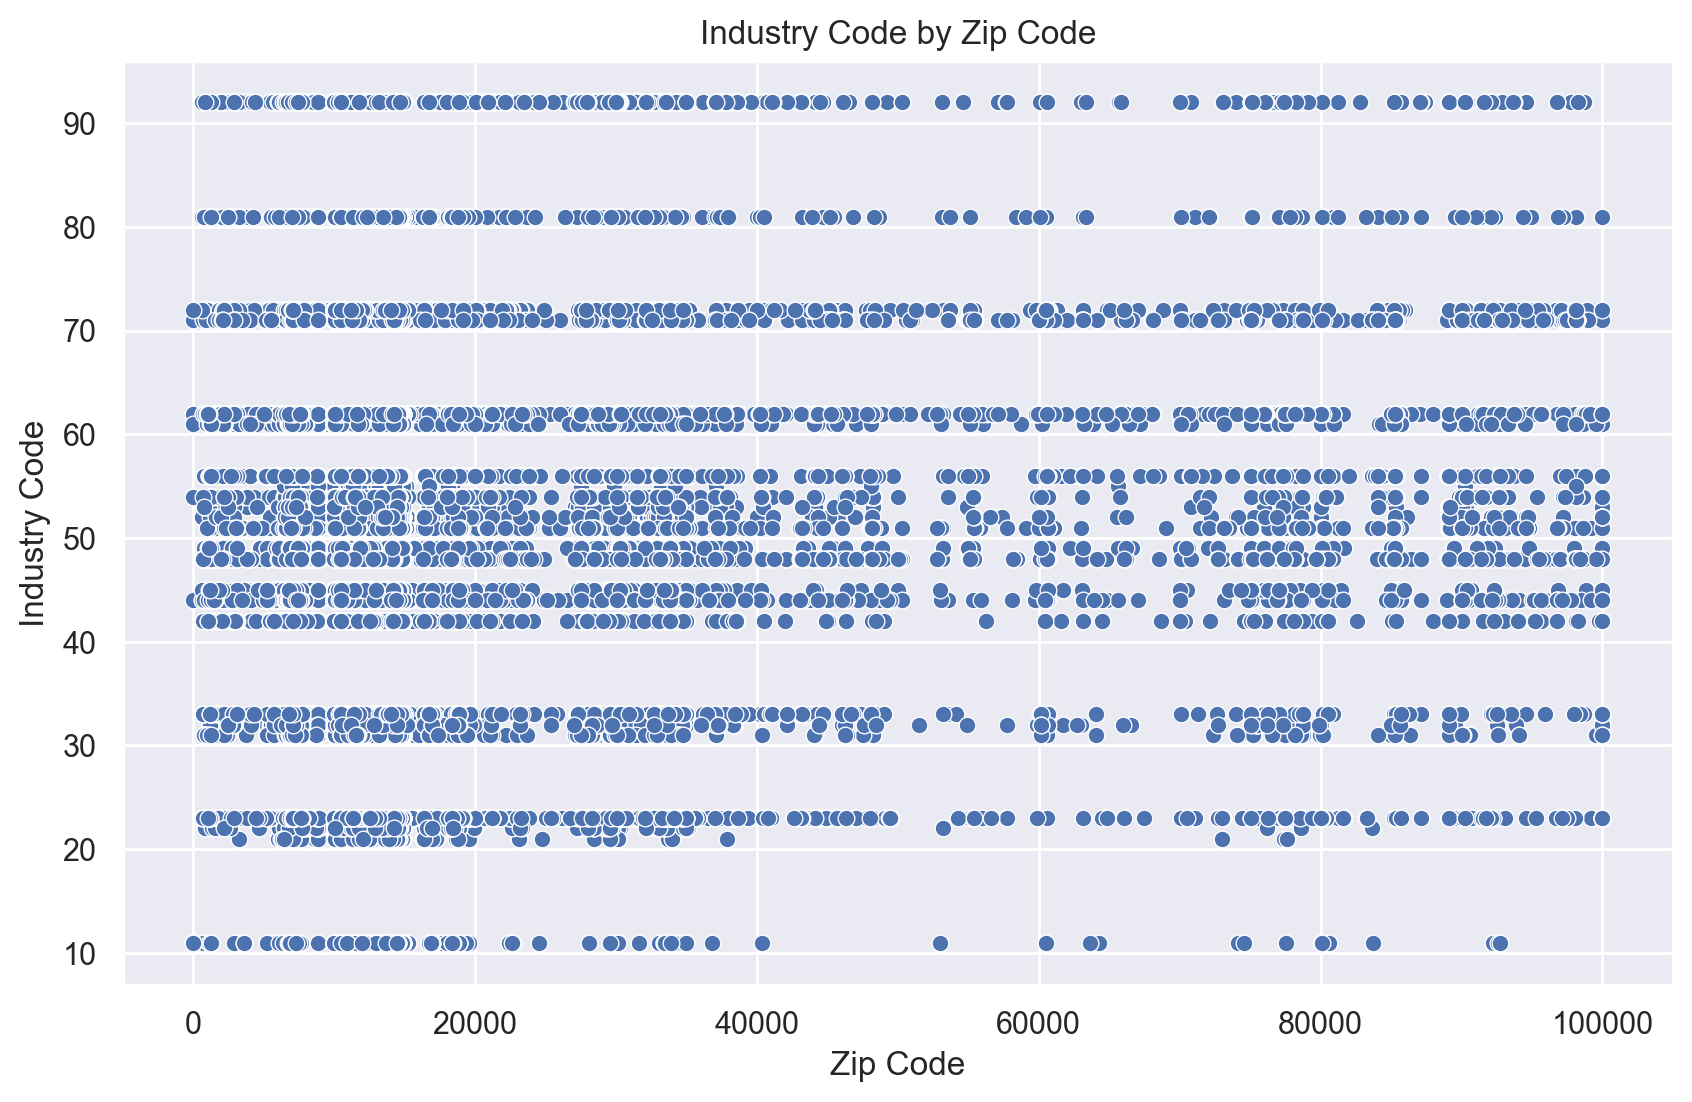

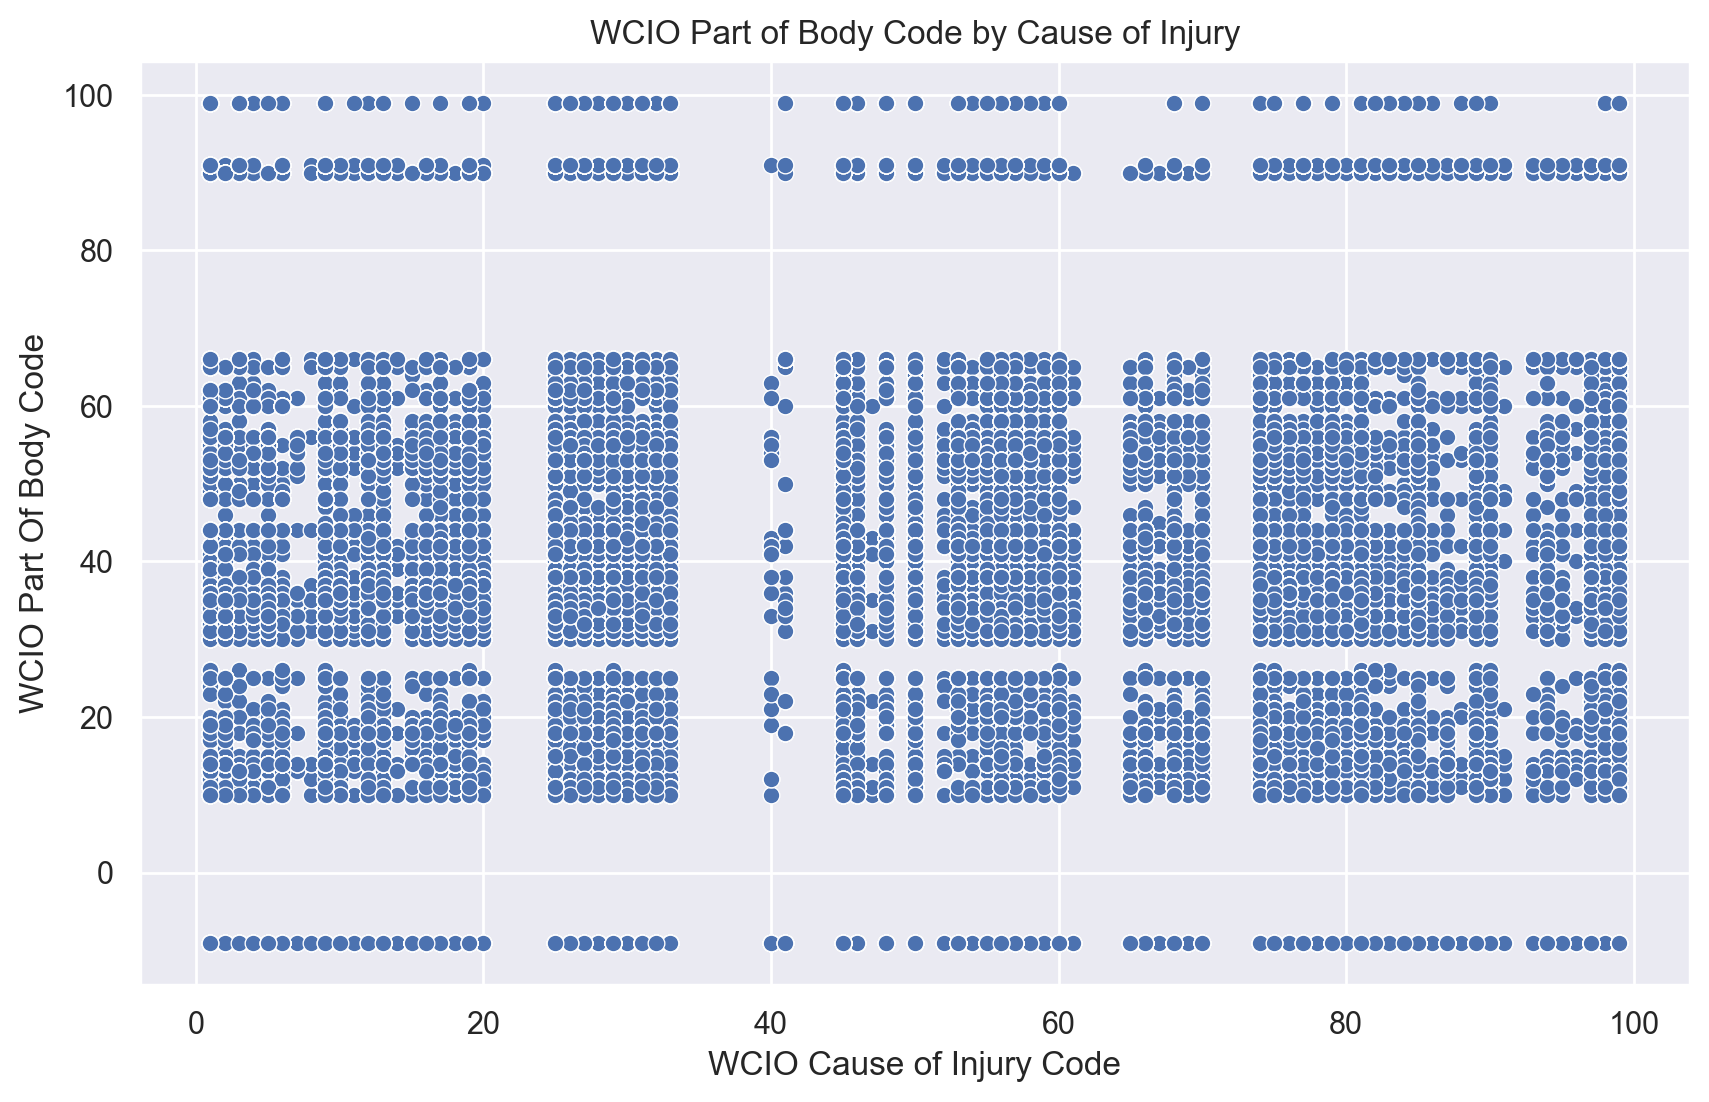

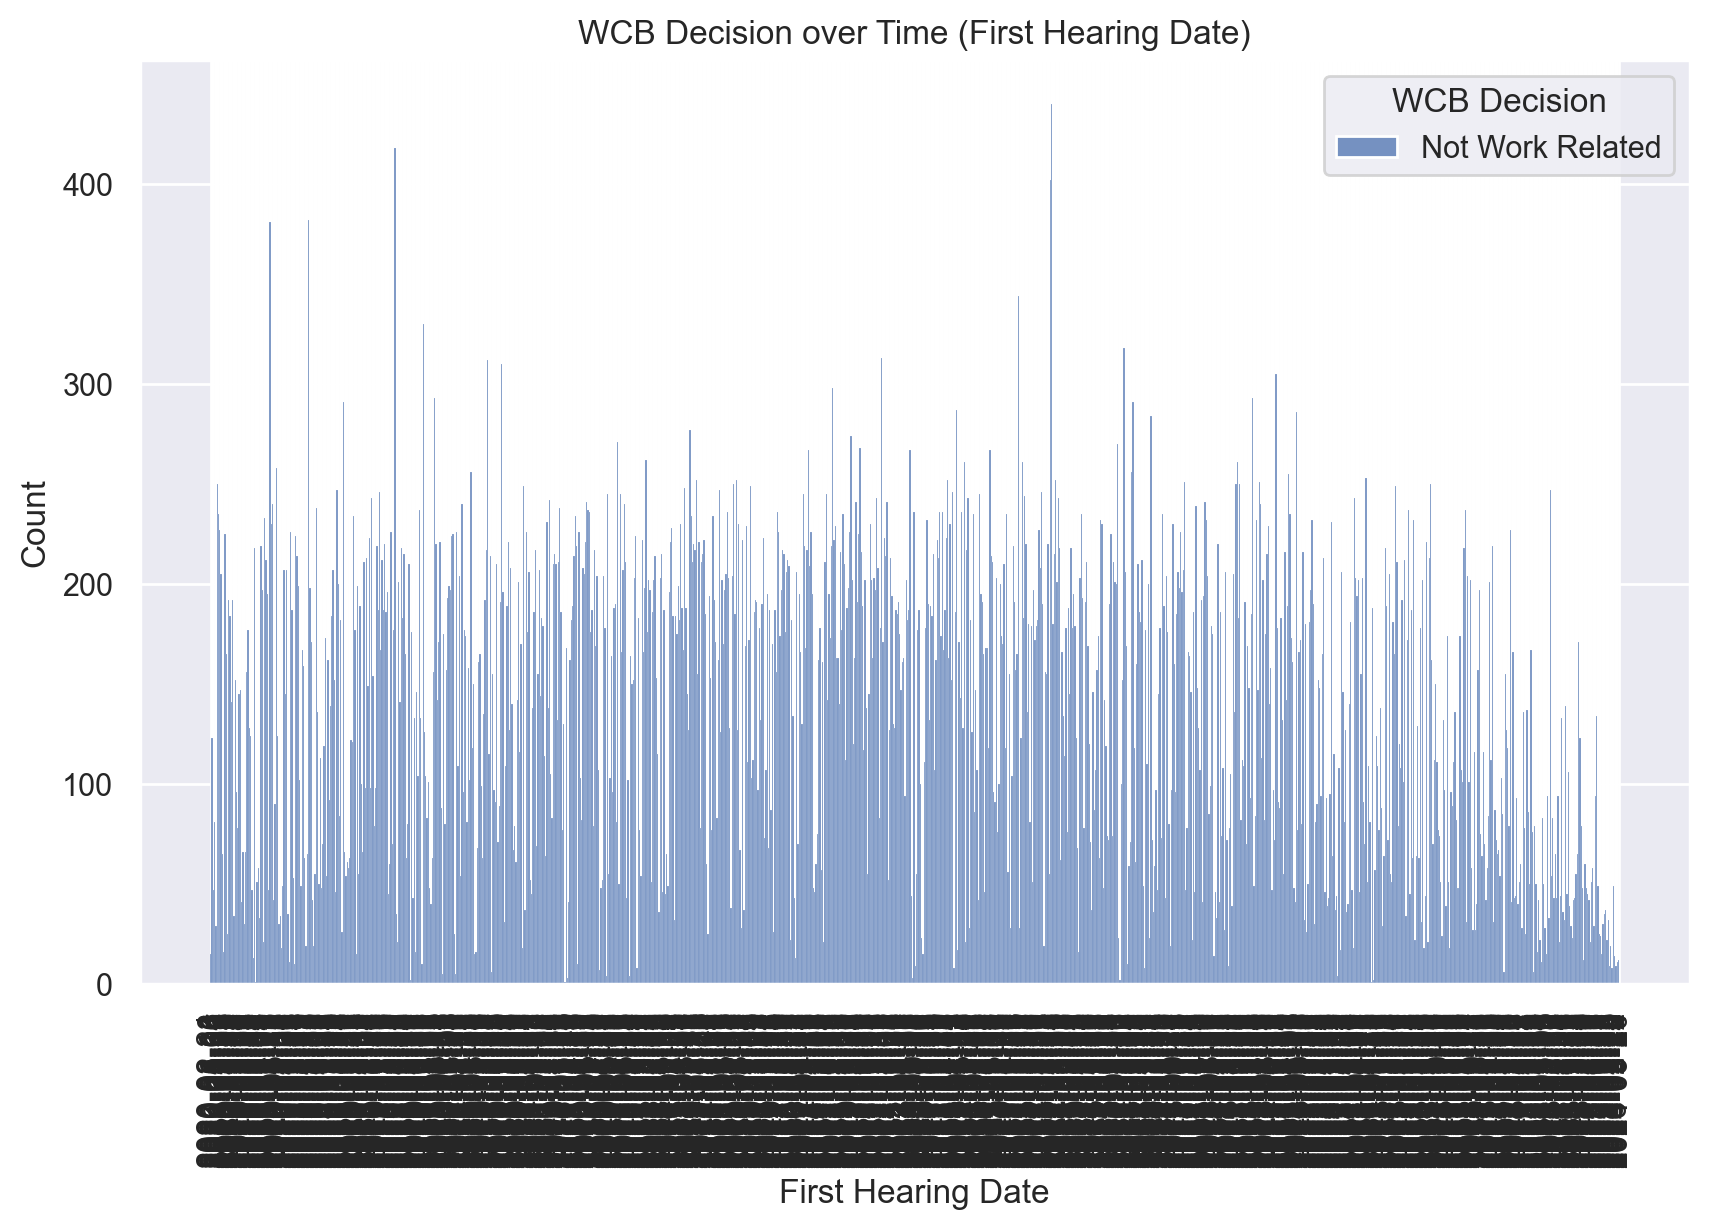

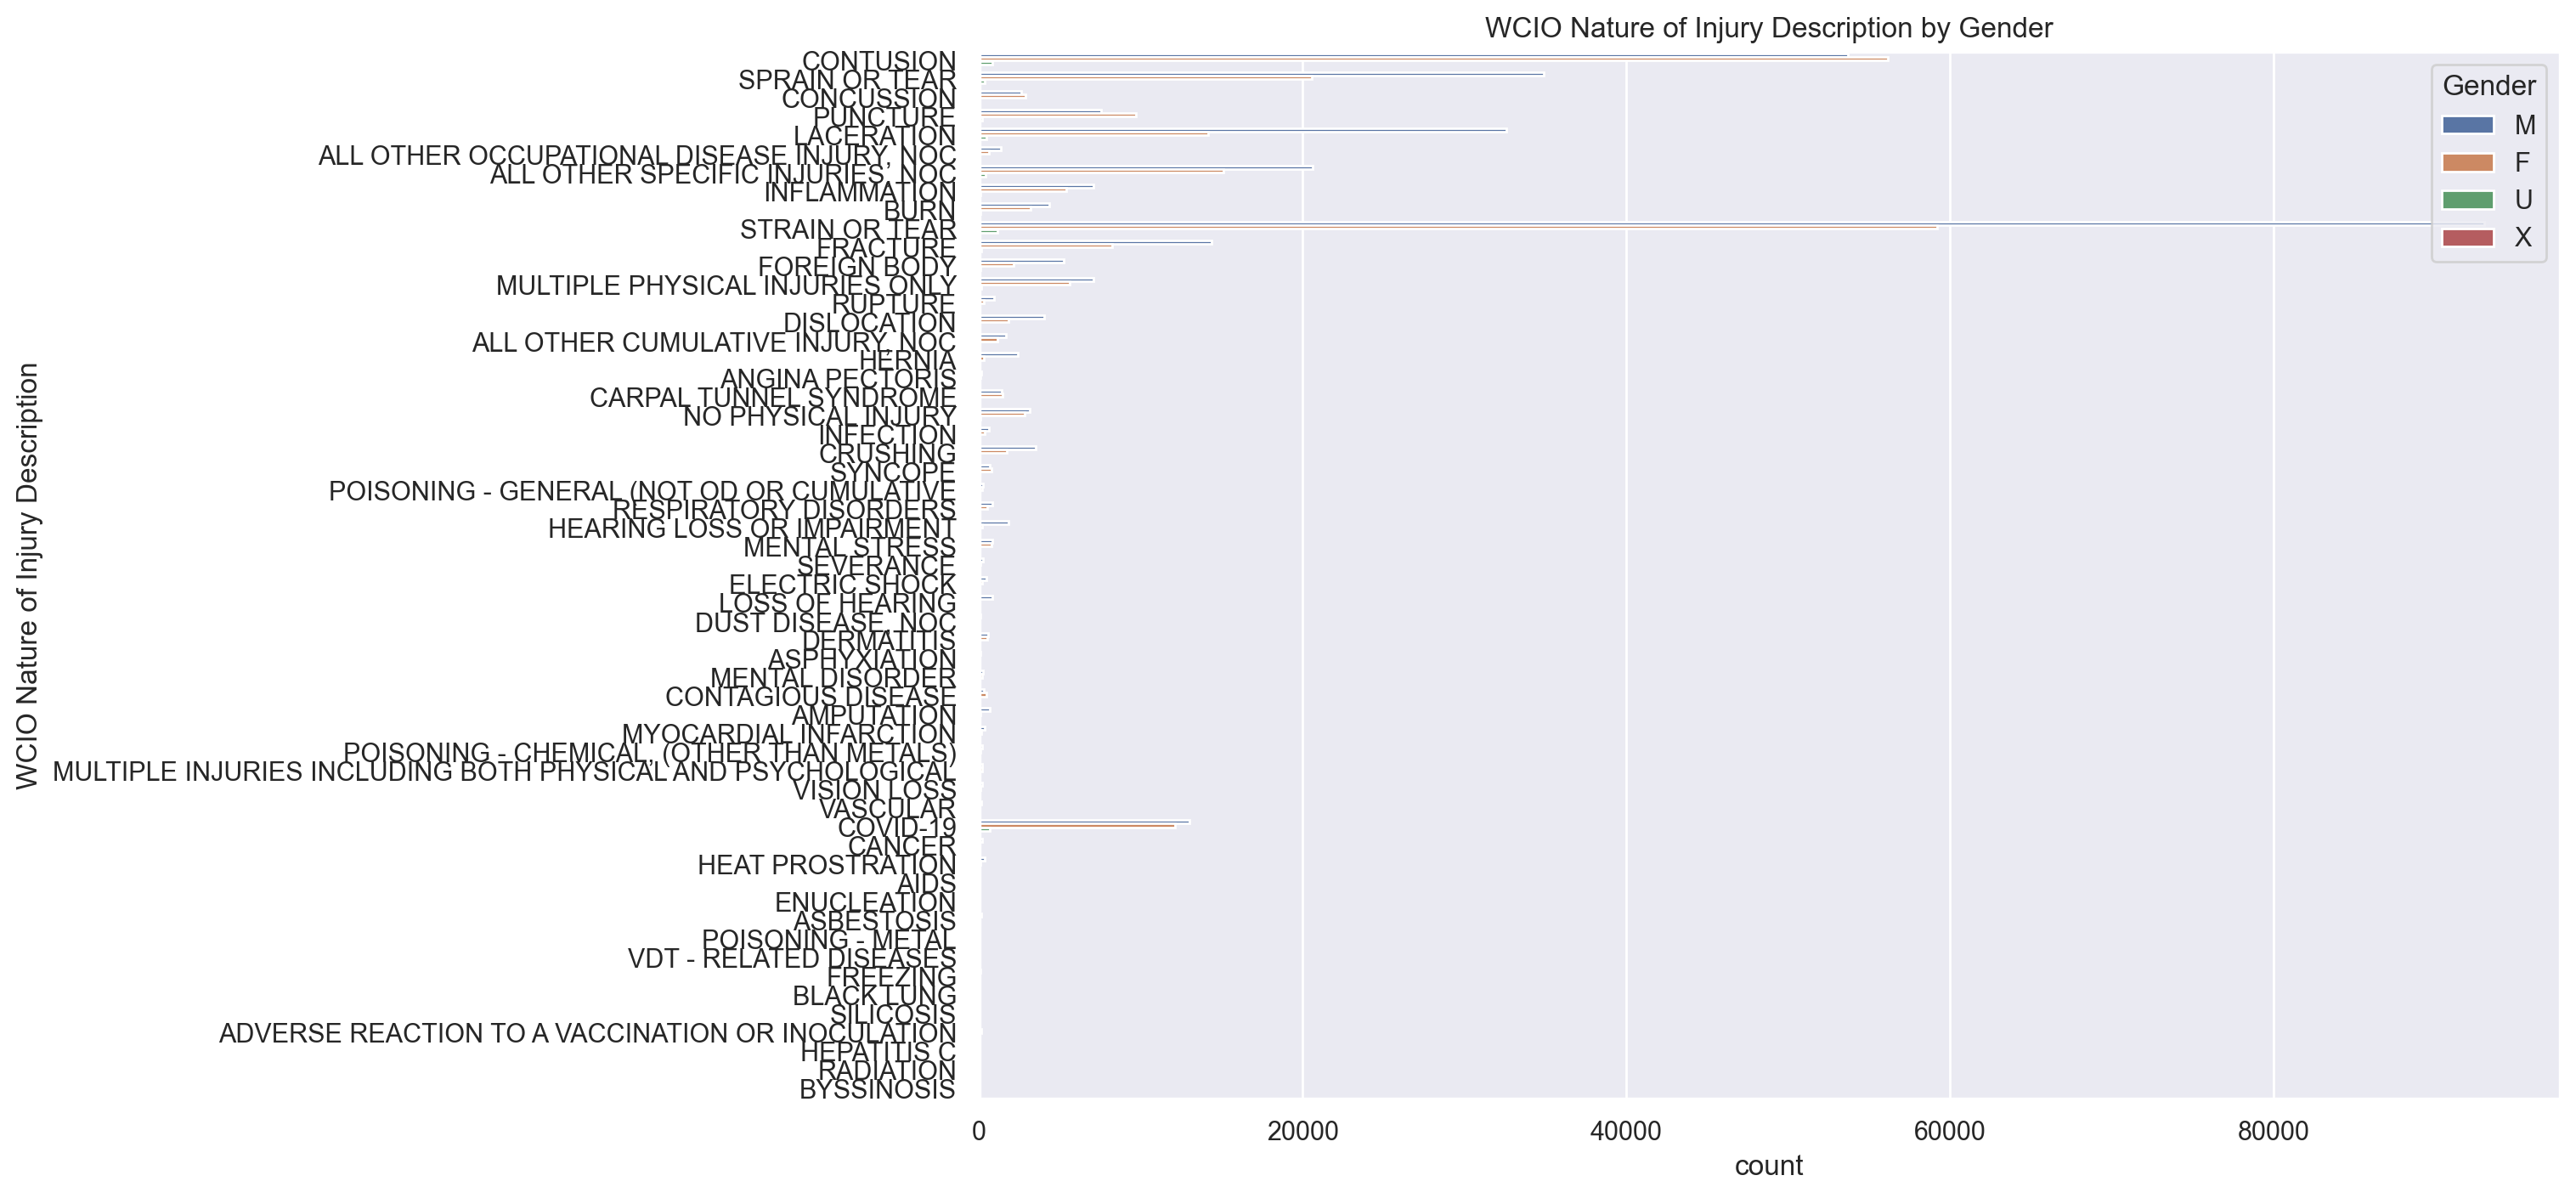

ValueError: Image size of 1726x360616 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

In [8]:

# Convert relevant columns to numeric data type if necessary
df['IME-4 Count'] = pd.to_numeric(df['IME-4 Count'], errors='coerce')
df['Industry Code'] = pd.to_numeric(df['Industry Code'], errors='coerce')
df['Zip Code'] = pd.to_numeric(df['Zip Code'], errors='coerce')
df['Number of Dependents'] = pd.to_numeric(df['Number of Dependents'], errors='coerce')

# 1. Gender and Number of Dependents
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Number of Dependents')
plt.title('Number of Dependents by Gender')
plt.show()

# 2. Industry Code with WCIO Cause of Injury Code and WCIO Nature of Injury Code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Industry Code', y='WCIO Cause of Injury Code', hue='WCIO Nature of Injury Code')
plt.title('Industry Code vs WCIO Cause of Injury Code by Nature of Injury')
plt.show()

# 3. Medical Fee Region with WCIO Part Of Body Description and WCIO Cause of Injury Description
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medical Fee Region', hue='WCIO Part Of Body Description')
plt.title('WCIO Part of Body Description by Medical Fee Region')
plt.xticks(rotation=90)
plt.show()

# 4. Industry Code Description and Medical Fee Region
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Industry Code Description', hue='Medical Fee Region')
plt.title('Medical Fee Region by Industry Code Description')
plt.legend(title='Medical Fee Region', loc='upper right')
plt.show()

# 5. IME-4 Count and WCIO Nature of Injury Description
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='WCIO Nature of Injury Description', y='IME-4 Count')
plt.title('IME-4 Count by Nature of Injury')
plt.xticks(rotation=90)
plt.show()

# 6. Zip Code and Industry Code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Zip Code', y='Industry Code')
plt.title('Industry Code by Zip Code')
plt.show()

# 7. WCIO Cause of Injury Code and WCIO Part Of Body Code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='WCIO Cause of Injury Code', y='WCIO Part Of Body Code')
plt.title('WCIO Part of Body Code by Cause of Injury')
plt.show()

# 8. First Hearing Date and WCB Decision
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='First Hearing Date', hue='WCB Decision', multiple='stack')
plt.title('WCB Decision over Time (First Hearing Date)')
plt.xticks(rotation=90)
plt.show()

# 9. Gender and WCIO Nature of Injury Description
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='WCIO Nature of Injury Description', hue='Gender')
plt.title('WCIO Nature of Injury Description by Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()

# 10. Zip Code and Medical Fee Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medical Fee Region', hue='Zip Code')
plt.title('Zip Code by Medical Fee Region')
plt.xticks(rotation=90)
plt.legend(title='Zip Code', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()